In [2]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
print("Loading data file now, this could take a while depending on file size")
start = time.time()
df = pd.read_csv('WORKSCOPEOPTION.csv') # ADD-CSV
end = time.time()
print("Loading took " + str(round(end - start, 2)) + " seconds")
missing_values = df.isna().sum().sum()
duplicated_values = df.duplicated().sum()
print(f'\nMissing values: {missing_values}')
print(f'Duplicated values: {duplicated_values}')
if missing_values >= 1:
    print('\nMissing values by column:')
    print(df.isna().sum())
print("\nUnique Values in Each Column:")
print(df.nunique())

Loading data file now, this could take a while depending on file size
Loading took 0.01 seconds

Missing values: 109
Duplicated values: 0

Missing values by column:
INDEX              0
WKSPN              0
ENGINE           109
ACTION             0
DESCRIPTION        0
MATERIALSBaht      0
dtype: int64

Unique Values in Each Column:
INDEX            1553
WKSPN             301
ENGINE             35
ACTION              4
DESCRIPTION       508
MATERIALSBaht     677
dtype: int64


In [3]:
df.dropna(inplace=True)

In [4]:
# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
non_numerical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Display the lists of numerical and categorical columns
print("\nNumerical Columns:", numerical_columns)
print("Categorical Columns:", non_numerical_columns)


Numerical Columns: ['INDEX']
Categorical Columns: ['WKSPN', 'ENGINE', 'ACTION', 'DESCRIPTION', 'MATERIALSBaht']


In [5]:
df['MATERIALSBaht'] = df['MATERIALSBaht'].str.replace(',', '').astype(float)
print(df.dtypes)

INDEX              int64
WKSPN             object
ENGINE            object
ACTION            object
DESCRIPTION       object
MATERIALSBaht    float64
dtype: object


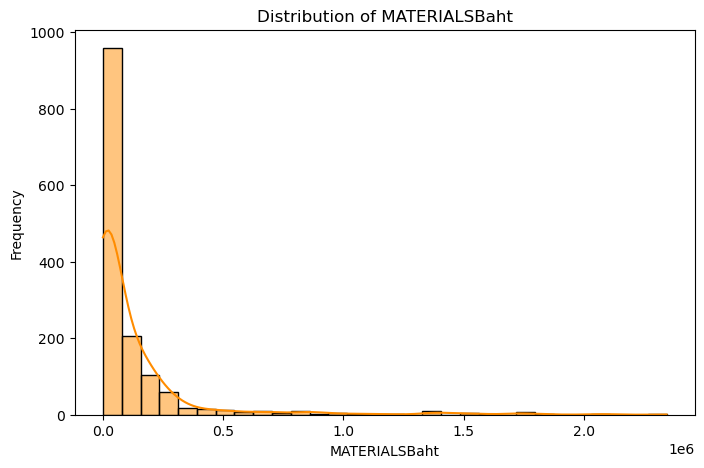

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_histograms(df, numerical_columns):
    for column in numerical_columns:
        plt.figure(figsize=(8, 5))
        sns.histplot(df[column], bins=30, kde=True, color='#ff8c00')  
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()


numerical_columns = ['MATERIALSBaht']
plot_histograms(df, numerical_columns)

In [7]:
df.head()

,INDEX,WKSPN,ENGINE,ACTION,DESCRIPTION,MATERIALSBaht
0,1,GECLDLM91E,MS9001E,Additional,Replace center swirler,52784.36
1,2,GECL01M61B,MS6001B,Additional,Replace swirler with L605 material,33368.40
2,3,GETP00M61B,MS6001B,Additional,Replace Inner Floating seals-Cloth seal type,21390.00
3,4,GETP00M61B,MS6001B,Additional,Replace Outer Floating seals-Cloth seal type,21390.00
4,77,MWBL01MW7D,MW701D,Option,Perform material life assessment as required i...,154008.00


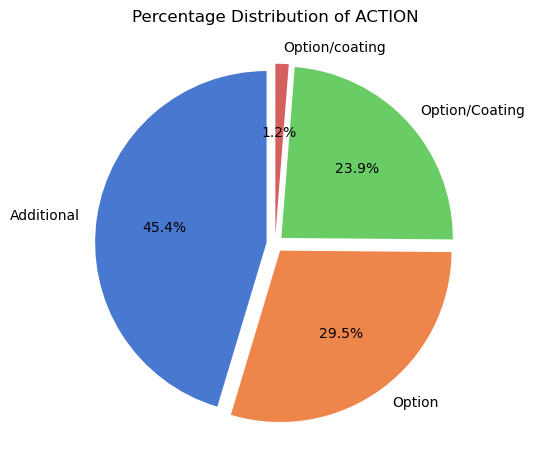

ACTION        
Additional        655
Option            426
Option/Coating    345
Option/coating     18
Name: count, dtype: int64


In [8]:
def plot_categorical_distributions(Categorical_Columns, data=df, palette='muted'):
    plt.figure(figsize=(15, 6))  
    
    for i, column_name in enumerate(Categorical_Columns):
        plt.subplot(1, 3, i + 1)  
        value_counts = data[column_name].value_counts()
        explode = [0.05] * len(value_counts)  # Adjust the length of explode list
        value_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette(palette), startangle=90, explode=explode)
        
        plt.title(f'Percentage Distribution of {column_name}')
        plt.ylabel('')  
    
    plt.tight_layout()
    plt.show()
    print(df[Categorical_Columns].value_counts())


columns_to_plot = ['ACTION']
plot_categorical_distributions(columns_to_plot)

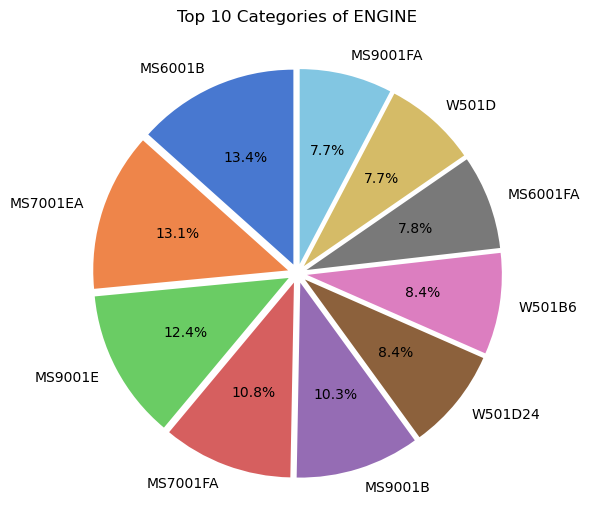

In [9]:
def plot_top_categories_pie_charts(Numerical_Columns, data=df, palette='muted'):
    plt.figure(figsize=(len(Numerical_Columns) * 6, 6))  
    
    # Loop through each column and create a pie chart
    for i, column_name in enumerate(Numerical_Columns):
        plt.subplot(1, len(Numerical_Columns), i + 1)  
        
        # Get the top 10 categories based on frequency
        top_categories = data[column_name].value_counts().nlargest(10)
        
        # Plot the pie chart
        top_categories.plot.pie(autopct='%1.1f%%', colors=sns.color_palette(palette), 
                                 startangle=90, explode=[0.05] * len(top_categories))
        
        plt.title(f'Top 10 Categories of {column_name}')
        plt.ylabel('')  
    
    plt.tight_layout()
    plt.show()


columns_to_plot = ['ENGINE']
plot_top_categories_pie_charts(columns_to_plot)

In [10]:
def plot_categorical_relationships(
    Categorical_Columns: str = "",
    data: pd.DataFrame = None,
    Numerical_Columns: str = "",
    top_n: int = 10,
    title_prefix: str = "Analysis",
    figsize: tuple = (18, 5),
    palette: str = "muted",
    rotation: int = 45,
    min_count: int = 1,
) -> None:
    # Input validation
    if not isinstance(data, pd.DataFrame):
        raise ValueError("data must be a pandas DataFrame")
    if Categorical_Columns not in data.columns:
        raise ValueError(f"Column '{Categorical_Columns}' not found in DataFrame")
    if Numerical_Columns not in data.columns:
        raise ValueError(f"Target column '{Numerical_Columns}' not found in DataFrame")
    if top_n < 1:
        raise ValueError("top_n must be positive")

    # Filter categories with minimum count
    value_counts = data[Categorical_Columns].value_counts()
    valid_categories = value_counts[value_counts >= min_count].head(top_n).index

    # Handle case when no categories meet criteria
    if len(valid_categories) == 0:
        print("No categories meet the minimum count criterion")
        return

    # Filter data
    filtered_data = data[data[Categorical_Columns].isin(valid_categories)].copy()

    # Sort categories by frequency
    category_order = filtered_data[Categorical_Columns].value_counts().index

    # Create figure
    plt.figure(figsize=figsize)

    # Bar Plot
    plt.subplot(1, 3, 1)
    avg_value = (
        filtered_data.groupby(Categorical_Columns)[Numerical_Columns]
        .agg(["mean", "count"])
        .reset_index()
    )
    sns.barplot(
        x=Categorical_Columns,
        y="mean",
        data=avg_value,
        order=category_order,
        palette=palette,
        hue=Categorical_Columns,
        legend=False
    )
    plt.title(
        f"{title_prefix}\nAverage {Numerical_Columns} by {Categorical_Columns}\n(Top {len(valid_categories)})"
    )
    plt.xlabel(f"{Categorical_Columns}\n(n=samples in each category)")
    plt.ylabel(f"Average {Numerical_Columns}")
    plt.xticks(rotation=rotation)

    # Add sample size annotations
    for i, count in enumerate(avg_value["count"]):
        plt.text(i, 0, f"n={count}", ha="center", va="bottom")

    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(
        x=Categorical_Columns,
        y=Numerical_Columns,
        data=filtered_data,
        order=category_order,
        palette=palette,
        hue=Categorical_Columns,
        legend=False
    )
    plt.title(f"{title_prefix}\n{Numerical_Columns} Distribution by {Categorical_Columns}")
    plt.xlabel(Categorical_Columns)
    plt.ylabel(Numerical_Columns)
    plt.xticks(rotation=rotation)

    # Violin Plot
    plt.subplot(1, 3, 3)
    sns.violinplot(
        x=Categorical_Columns,
        y=Numerical_Columns,
        data=filtered_data,
        order=category_order,
        palette=palette,
        hue=Categorical_Columns,
        legend=False
    )
    plt.title(f"{title_prefix}\n{Numerical_Columns} Distribution (Violin) by {Categorical_Columns}")
    plt.xlabel(Categorical_Columns)
    plt.ylabel(Numerical_Columns)
    plt.xticks(rotation=rotation)
    print(filtered_data[Categorical_Columns].value_counts())
    # Adjust layout and display
    plt.tight_layout()
    plt.show()


ACTION
Additional        655
Option            426
Option/Coating    345
Option/coating     18
Name: count, dtype: int64


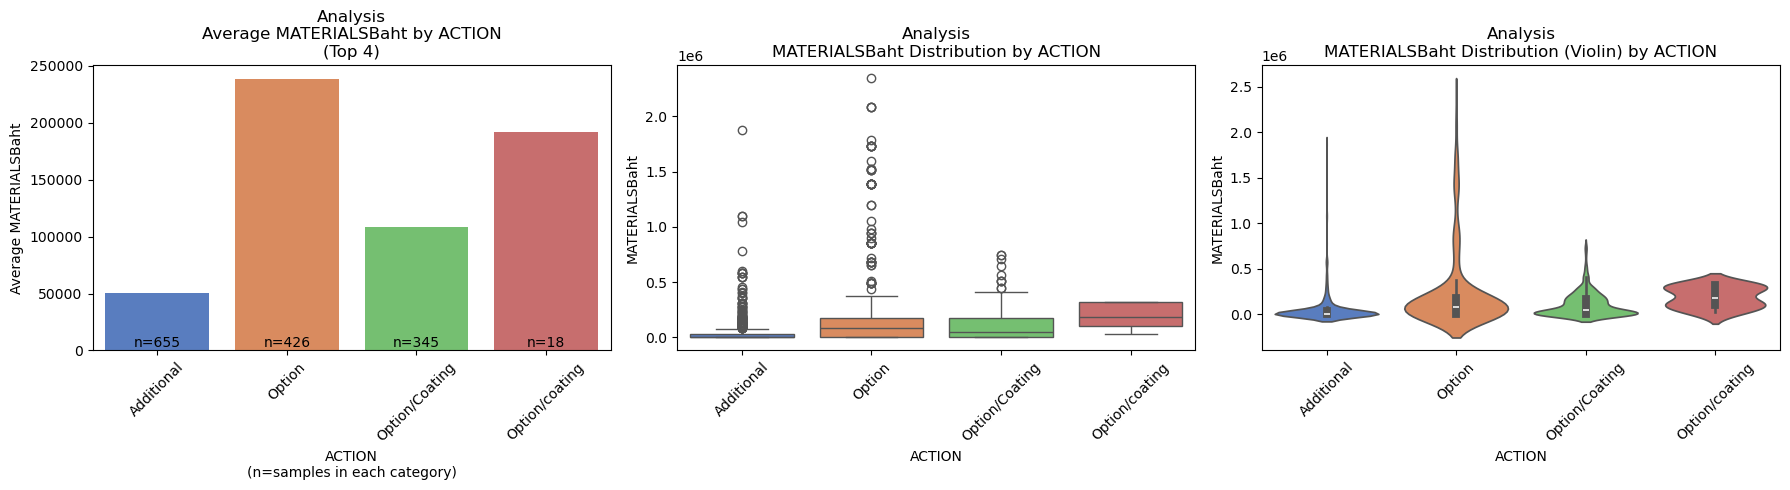

In [11]:
plot_categorical_relationships(data=df,Categorical_Columns='ACTION', Numerical_Columns='MATERIALSBaht')

ENGINE
MS6001B     113
MS7001EA    111
MS9001E     105
MS7001FA     91
MS9001B      87
W501D24      71
W501B6       71
MS6001FA     66
W501D        65
MS9001FA     65
Name: count, dtype: int64


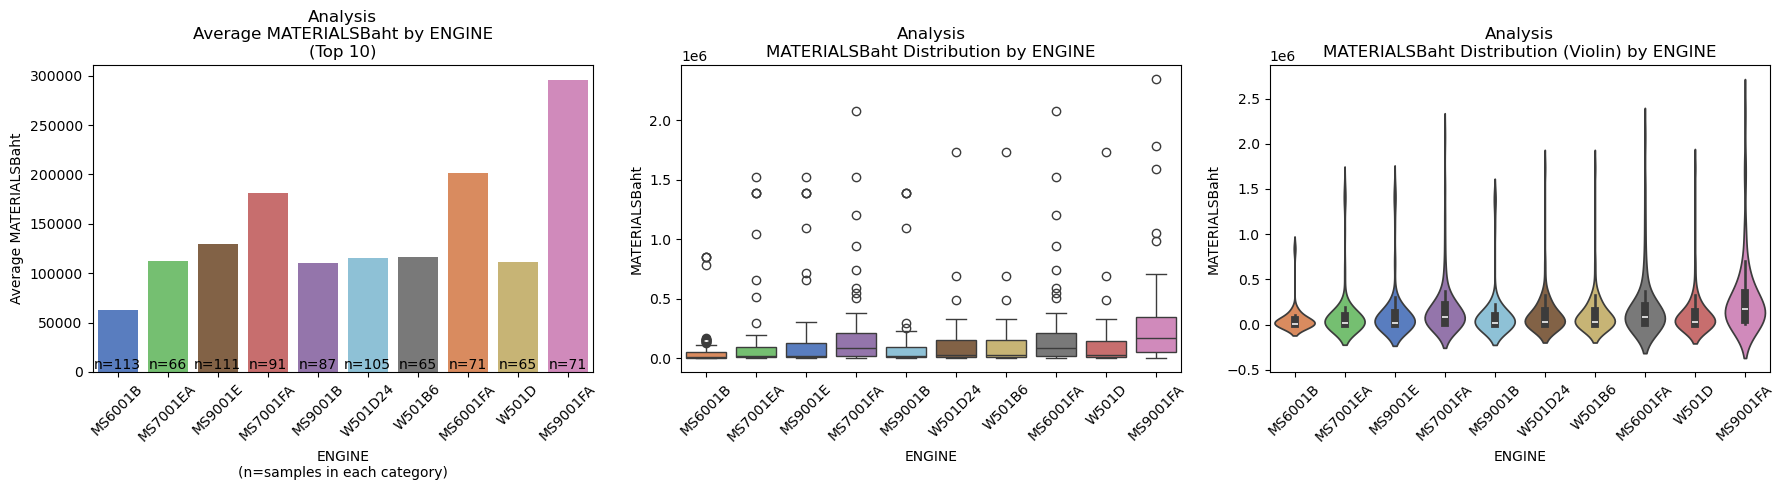

In [12]:
plot_categorical_relationships(data=df,Categorical_Columns='ENGINE', Numerical_Columns='MATERIALSBaht')

In [13]:
def plot_categorical_relationships(
    Categorical_Columns: str = "",
    data: pd.DataFrame = None,
    Numerical_Columns: str = "",
    top_n: int = 10,
    title_prefix: str = "Analysis",
    figsize: tuple = (18, 5),
    palette: str = "muted",
    rotation: int = 45,
    min_count: int = 1,
) -> None:
    
    value_counts = data[Categorical_Columns].value_counts()
    top_categories = value_counts[value_counts >= min_count].head(top_n).index
    
    # Filter data for top categories
    filtered_data = data[data[Categorical_Columns].isin(top_categories)].copy()
    
    # Calculate average values and counts for each category
    avg_value = pd.DataFrame({
        'category': filtered_data[Categorical_Columns].unique(),
        'count': filtered_data[Categorical_Columns].value_counts().sort_index(),
        'mean': filtered_data.groupby(Categorical_Columns)[Numerical_Columns].mean()
    }).reset_index(drop=True)
    
    # Create figure with subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=figsize)
    
    # Bar plot
    sns.barplot(
        data=filtered_data,
        x=Categorical_Columns,
        y=Numerical_Columns,
        ax=ax1,
        palette=palette
    )
    # Add count labels
    for i, count in enumerate(avg_value['count']):
        ax1.text(i, ax1.get_ylim()[0], f"n={count}", ha="center", va="bottom")
    ax1.set_title(f"{title_prefix} - Bar Plot")
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=rotation)
    
    # Box plot
    sns.boxplot(
        data=filtered_data,
        x=Categorical_Columns,
        y=Numerical_Columns,
        ax=ax2,
        palette=palette
    )
    # Add count labels
    for i, count in enumerate(avg_value['count']):
        ax2.text(i, ax2.get_ylim()[0], f"n={count}", ha="center", va="bottom")
    ax2.set_title(f"{title_prefix} - Box Plot")
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=rotation)
    
    # Violin plot
    sns.violinplot(
        data=filtered_data,
        x=Categorical_Columns,
        y=Numerical_Columns,
        ax=ax3,
        palette=palette
    )
    # Add count labels
    for i, count in enumerate(avg_value['count']):
        ax3.text(i, ax3.get_ylim()[0], f"n={count}", ha="center", va="bottom")
    ax3.set_title(f"{title_prefix} - Violin Plot")
    ax3.set_xticklabels(ax3.get_xticklabels(), rotation=rotation)
    
    print(filtered_data[Categorical_Columns].value_counts())
    plt.tight_layout()
    plt.show()

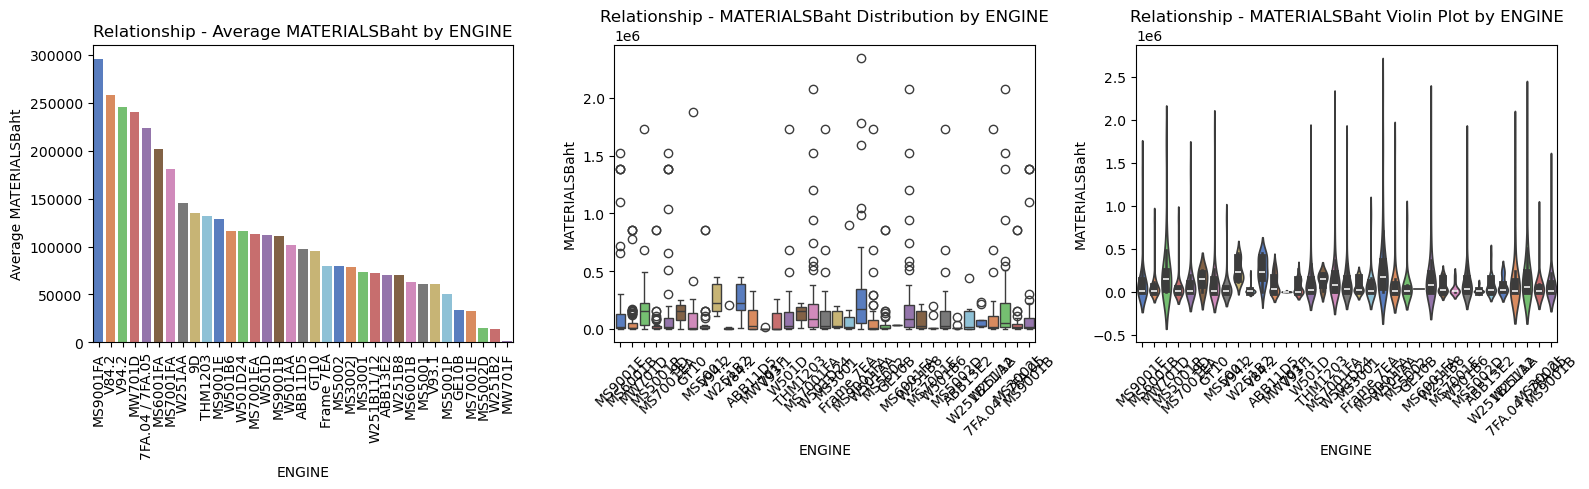

In [16]:
# Define a function to create bar plots, boxplots, and violin plots for relationships between a categorical variable and TransactionAmount
def plot_categorical_relationships(Categorical_Columns='column', data=df, Numerical_Columns='', title_prefix='Relationship'):
    plt.figure(figsize=(16, 5))

    # Bar Plot
    plt.subplot(1, 3, 1)
    avg_data = data.groupby(Categorical_Columns)[Numerical_Columns].mean().sort_values(ascending=False)
    sns.barplot(x=avg_data.index, y=avg_data.values, palette='muted')
    plt.title(f'{title_prefix} - Average {Numerical_Columns} by {Categorical_Columns}')
    plt.xlabel(Categorical_Columns)
    plt.ylabel(f'Average {Numerical_Columns}')
    plt.xticks(rotation=90)
    
    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=Categorical_Columns, y=Numerical_Columns, data=data, palette='muted')
    plt.title(f'{title_prefix} - {Numerical_Columns} Distribution by {Categorical_Columns}')
    plt.xlabel(Categorical_Columns)
    plt.ylabel(Numerical_Columns)
    plt.xticks(rotation=45)
    
    # Violin Plot
    plt.subplot(1, 3, 3)
    sns.violinplot(x=Categorical_Columns, y=Numerical_Columns, data=data, palette='muted')
    plt.title(f'{title_prefix} - {Numerical_Columns} Violin Plot by {Categorical_Columns}')
    plt.xlabel(Categorical_Columns)
    plt.ylabel(Numerical_Columns)
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

# Example usage with default parameters
target_Numerical_Columns = ['MATERIALSBaht']
for column in target_Numerical_Columns:
    plot_categorical_relationships(Categorical_Columns='ENGINE', Numerical_Columns=column)